Project Question:

Can we predict whether Nigeria will have trade deficit or surplus using monthly data on Exports, Imports, Crude Oil, Crude Oil Production, Exchange Rate and Inflation obtained from Trading Economics from January 1996 till March 2016.

Problem Statement:
Since the early 2000s, oil and gas exports have accounted for more than 98% of export earnings and about 83% of federal government revenue, as well as generating more than 14% of its GDP. It also provided 95% of foreign exchange earnings and about 65% of government earnings and about 65% of government budgetary revenues. Thus making Nigeria’s economy heavily dependent on Petroleum and the lack of economic diversity makes her very venerable to price swings. As of 2011, oil was trading at over $100 per barrel but is currently trading at less than $50 per barrel. The current crash in the price of crude oil in the international market portends negative implications for the Nigerian economy. 

Project Background:

I started this project initally trying to predict if Nigeria will enter a recession given the price. However, I was unable to get some critical data (mothly/quaterly GDP). The low price of oil has economic implication for the Nigerian economy so I decided to focus on an aspect of the economy - trade. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', None)
import statsmodels.api as sm
import pylab as pl
import numpy as np
from sklearn import cross_validation
from sklearn import neighbors
from sklearn import grid_search
from sklearn import metrics
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.5)
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn import ensemble

In [2]:
# Load data
df1 = pd.read_csv("CO1.csv", index_col=False)
df2 = pd.read_csv("Nigeria Crude Oil Production.csv", index_col=False)
df3 = pd.read_csv("Nigerian Naira.csv", index_col=False) 
df4 = pd.read_csv("NigeriaIR.csv", index_col=False)
df5 = pd.read_csv("Nigeria Balance of Trade.csv", index_col=False)
df6 = pd.read_csv("NigeriaEx.csv", index_col=False)
df7 = pd.read_csv("NigeriaIm.csv", index_col=False)

Above is the data from Trading Economics.

Data Dictionary:
COP - Crude Oil Price

COProd - Crude Oil Production 

DR - Dollar rate against the Naira

IR - Inflation Rate

Exports - Exports

Imports - Imports 

BOT - Numerical value of Balance of Trade 

BOTcat - Categorical Balance of Trade. 0 = Trade deficit and 1 = Trade Surplus (for the purpose this analysis 1 incorporates both balanced trade and trade surplus)

In [3]:
from datetime import datetime

# Add extra columns to break out month and year by applying datetime to the variable '[Datetime]'
df1['Month'] = df1['[DateTime]'].apply(lambda x: datetime.strptime(x, '%m/%d/%y').month)
df1['Year'] = df1['[DateTime]'].apply(lambda x: datetime.strptime(x, '%m/%d/%y').year)

#group COP by month and year and find the mean
df1 = df1['COP'].groupby([df1['Year'], df1['Month']]).mean()
df1 = df1.reset_index()

There are some months missing in the df1 so i'm creating df_all and specifying the range of months and years. I am merging df_all with df1 to identify the missing values 

In [4]:
df_all = pd.DataFrame()
df_all['Year'] = pd.date_range(start='1970', end='2016', freq='M').year
df_all['Month'] = pd.date_range(start='1970', end='2016', freq='M').month

df1 = pd.merge(df_all, df1, how='outer', on=['Year', 'Month'])
df1[['Year', 'Month']] = df1[['Year', 'Month']].astype(int)

In [5]:
#fill all missing data with the value that comes after it
df1 = df1.fillna(method='bfill')

#sets the range for years to inlcude
df1 = df1[(df1['Year']>1980)&(df1['Year']<2017)]

In [6]:
df2['Month'] = df2['[DateTime]'].apply(lambda x: datetime.strptime(x, '%m/%d/%y').month)
df2['Year'] = df2['[DateTime]'].apply(lambda x: datetime.strptime(x, '%m/%d/%y').year)
df2 = df2['COProd'].groupby([df2['Year'], df2['Month']]).mean()
df2 = df2.reset_index()
df2 = df2[(df2['Year']>1980)&(df2['Year']<2017)]

In [7]:
df3['Month'] = df3['[DateTime]'].apply(lambda x: datetime.strptime(x, '%m/%d/%y').month)
df3['Year'] = df3['[DateTime]'].apply(lambda x: datetime.strptime(x, '%m/%d/%y').year)
df3 = df3['DR'].groupby([df3['Year'], df3['Month']]).mean()
df3 = df3.reset_index()
df3 = df3[(df3['Year']>1980)&(df3['Year']<2017)]

In [8]:
df4['Month'] = df4['[DateTime]'].apply(lambda x: datetime.strptime(x, '%m/%d/%y').month)
df4['Year'] = df4['[DateTime]'].apply(lambda x: datetime.strptime(x, '%m/%d/%y').year)
df4 = df4['IR'].groupby([df4['Year'], df4['Month']]).mean()
df4 = df4.reset_index()
df4 = df4[(df4['Year']>1969)&(df4['Year']<2017)]

In [9]:
df5['Month'] = df5['[DateTime]'].apply(lambda x: datetime.strptime(x, '%m/%d/%y').month)
df5['Year'] = df5['[DateTime]'].apply(lambda x: datetime.strptime(x, '%m/%d/%y').year)
df5 = df5['BOT'].groupby([df5['Year'], df5['Month']]).mean()
df5 = df5.reset_index()

In [10]:
df6['Month'] = df6['[DateTime]'].apply(lambda x: datetime.strptime(x, '%m/%d/%y').month)
df6['Year'] = df6['[DateTime]'].apply(lambda x: datetime.strptime(x, '%m/%d/%y').year)
df6 = df6['Exports'].groupby([df6['Year'], df6['Month']]).mean()
df6 = df6.reset_index()
df6 = df6[(df6['Year']>1980)&(df6['Year']<2017)]

In [11]:
df7['Month'] = df7['[DateTime]'].apply(lambda x: datetime.strptime(x, '%m/%d/%y').month)
df7['Year'] = df7['[DateTime]'].apply(lambda x: datetime.strptime(x, '%m/%d/%y').year)
df7 = df7['Imports'].groupby([df7['Year'], df7['Month']]).mean()
df7 = df7.reset_index()
df7 = df7[(df7['Year']>1980)&(df7['Year']<2017)]

In [12]:
#merge all the data into a new dataframe df 
df = pd.merge(df1, df2, how='outer', on=['Year', 'Month'])
df = pd.merge(df, df3, how='outer', on=['Year', 'Month'])
df = pd.merge(df, df4, how='outer', on=['Year', 'Month'])
df = pd.merge(df, df6, how='outer', on=['Year', 'Month'])
df = pd.merge(df, df7, how='outer', on=['Year', 'Month'])
df = pd.merge(df, df5, how='outer', on=['Year', 'Month'])

My project is a classification problem so I want the response to have two outcomes 
0 - when BOT is less than 0
1 - when BOT is greater than or equal to 0 

In [13]:
#creates a new varibles BOTcat and equates is to 0 when BOT < 0 and 1, otherwise
df['BOTcat'] = np.where(df['BOT'] < 0, 0, 1)

In [14]:
#fill missing values in IR with the mean IR value
df['IR'].fillna(df.mean()['IR'], inplace=True)

#create a new dataframe that removes all missing values in df
dff = df.dropna()
dff.head()

,Year,Month,COP,COProd,DR,IR,Exports,Imports,BOT,BOTcat
0,1981,1,40.15,2092.0,0.53,12.151585,1113.509,887.045,226.464,1
1,1981,2,38.35,1943.0,0.55,12.151585,889.816,893.653,-3.837,0
2,1981,3,38.35,1868.0,0.57,12.151585,972.399,990.248,-17.849,0
3,1981,4,38.35,1623.0,0.60,12.151585,901.876,989.797,-87.921,0
4,1981,5,37.19,1293.0,0.60,12.151585,755.075,1018.501,-263.426,0


In [15]:
#create a new column that combines year and month and make it the index
dff['Year-Month'] = dff['Year'].map(str) + '-' + dff['Month'].map(str)
dff.set_index('Year-Month', inplace=True)

dff = dff.drop(['Year', 'Month'] , axis=1)
dff.head()

/Users/samantha/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,COP,COProd,DR,IR,Exports,Imports,BOT,BOTcat
Year-Month,,,,,,,,
1981-1,40.15,2092.0,0.53,12.151585,1113.509,887.045,226.464,1
1981-2,38.35,1943.0,0.55,12.151585,889.816,893.653,-3.837,0
1981-3,38.35,1868.0,0.57,12.151585,972.399,990.248,-17.849,0
1981-4,38.35,1623.0,0.60,12.151585,901.876,989.797,-87.921,0
1981-5,37.19,1293.0,0.60,12.151585,755.075,1018.501,-263.426,0


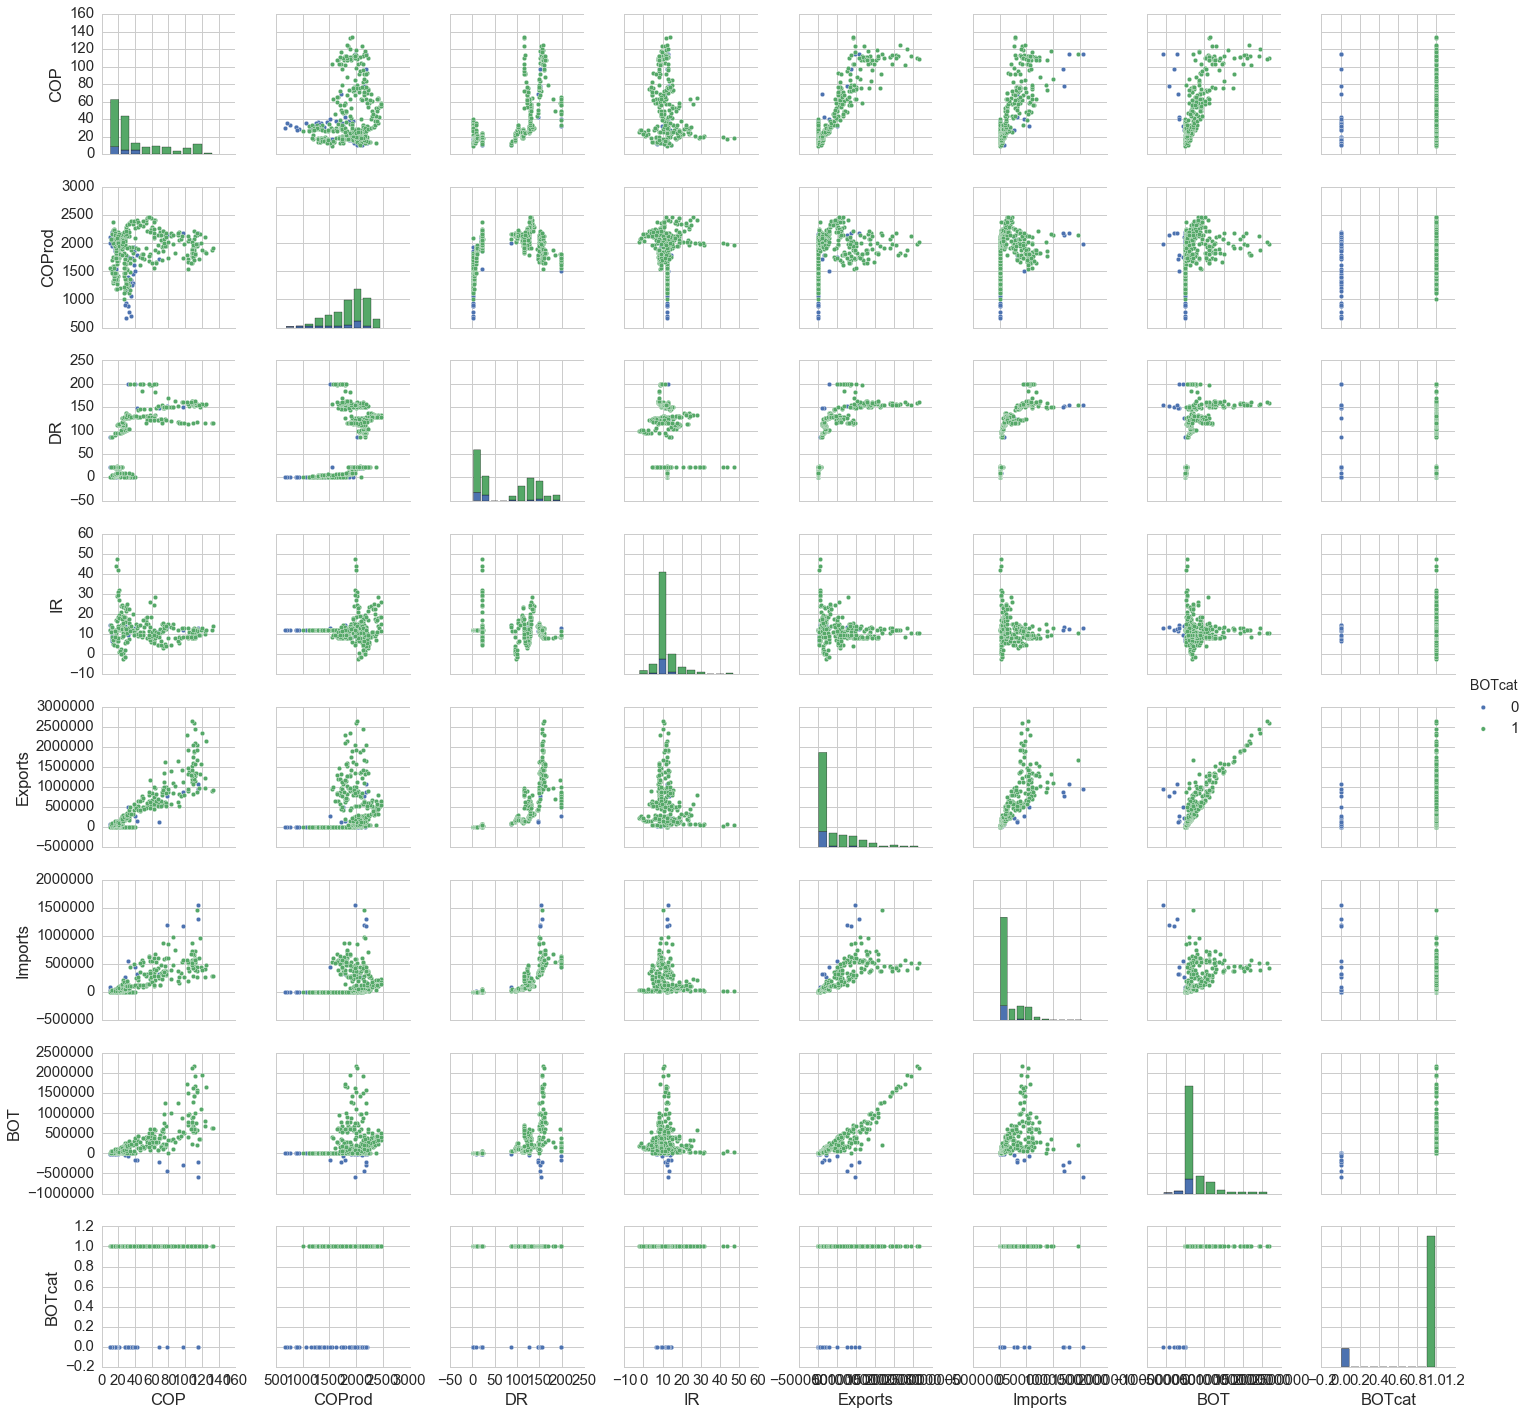

In [16]:
#Display the relationship between all the variables by BOTcat
sns.pairplot(dff, hue='BOTcat')

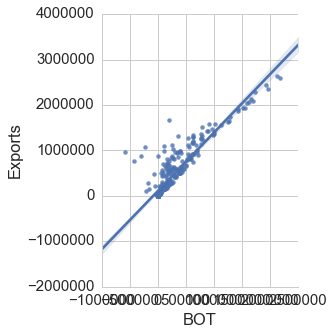

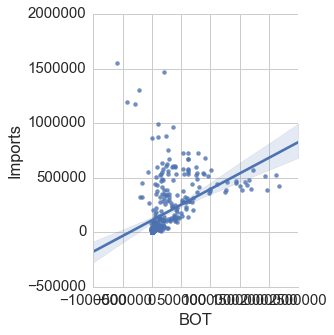

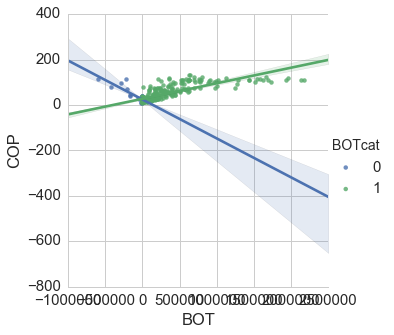

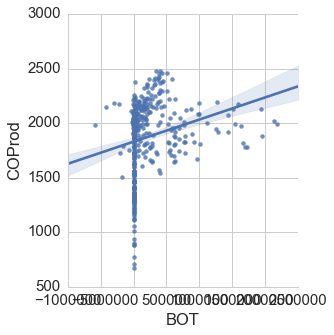

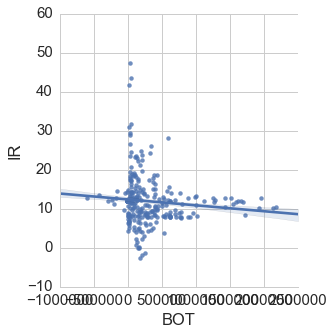

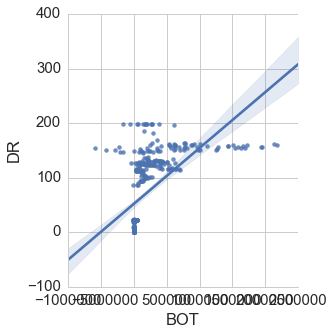

In [17]:
sns.lmplot('BOT', 'Exports', dff)
sns.lmplot('BOT', 'Imports', dff)
sns.lmplot('BOT', 'COP', dff, hue='BOTcat')
sns.lmplot('BOT', 'COProd', dff)
sns.lmplot('BOT', 'IR', dff)
sns.lmplot('BOT', 'DR', dff)

              COP    COProd        DR        IR   Exports   Imports
COP      1.000000  0.166103  0.712213 -0.187613  0.902131  0.796763
COProd   0.166103  1.000000  0.459137  0.052733  0.250929  0.196965
DR       0.712213  0.459137  1.000000 -0.129446  0.763641  0.762170
IR      -0.187613  0.052733 -0.129446  1.000000 -0.157425 -0.170869
Exports  0.902131  0.250929  0.763641 -0.157425  1.000000  0.772137
Imports  0.796763  0.196965  0.762170 -0.170869  0.772137  1.000000


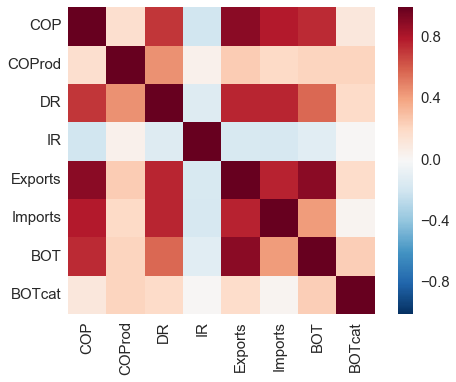

In [18]:
#create a heapmap to check the correlation of variables
cm = dff.corr()
sns.heatmap(cm, square=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)

correlations = dff[['COP', 'COProd', 'DR', 'IR', 'Exports', 'Imports']].corr()
print correlations

There is a strong positive correlation between COP and exports - as COP increases, Exports increase. This is expected as Crude Oil is the largest component of Nigeria of Nigeria's exports. 

In [19]:
dff.groupby('BOTcat').describe()

BOT         COP       COProd          DR       Exports  \
BOTcat                                                                          
0      count  5.100000e+01   51.000000    51.000000   51.000000  5.100000e+01   
       mean  -4.490008e+04   32.013093  1671.568627   38.312846  1.052877e+05   
       std    1.158549e+05   23.696772   459.582735   59.092567  2.574874e+05   
       min   -5.922007e+05   10.160000   675.000000    0.550000  3.229290e+02   
       25%   -9.837347e+03   16.531645  1332.000000    0.670000  8.404345e+02   
       50%   -8.266300e+02   29.264783  1868.000000   21.890000  7.612341e+03   
       75%   -2.539555e+02   35.866750  2025.000000   21.890000  3.225724e+04   
       max   -3.837000e+00  114.929545  2210.000000  199.064000  1.074546e+06   
1      count  3.720000e+02  372.000000   372.000000  372.000000  3.720000e+02   
       mean   2.323710e+05   43.294349  1898.279570   77.062815  4.011517e+05   
       std    3.832697e+05   32.625092   306.557404   65.923619  5.474472e+05   
       min    5.905900e+01    9.510870  1016.000000    0.530000  4.344090e+02   
       25%    3.679471e+03   18.836682  1730.250000    7.947500  7.518195e+03   
       50%    5.537710e+04   28.193250  1952.500000   98.190000  1.408964e+05   
       75%    2.926793e+05   62.399740  2130.000000  130.162825  6.141813e+05   
       max    2.177553e+06  133.585217  2475.000000  199.338182  2.648882e+06   

                      IR       Imports  
BOTcat                                  
0      count   51.000000  5.100000e+01  
       mean    11.994287  1.501878e+05  
       std      1.341840  3.629739e+05  
       min      6.360000  4.749260e+02  
       25%     12.151585  1.006396e+03  
       50%     12.151585  1.072106e+04  
       75%     12.151585  3.925118e+04  
       max     14.600000  1.554733e+06  
1      count  372.000000  3.720000e+02  
       mean    12.148029  1.687807e+05  
       std      5.472555  2.297457e+05  
       min     -2.490000  1.678800e+02  
       25%      9.675000  2.814176e+03  
       50%     12.151585  4.700738e+04  
       75%     12.237500  2.908902e+05  
       max     47.560000  1.467581e+06

Model Evaluation

In [20]:
#show the columns in my model
dff.columns

Index([u'COP', u'COProd', u'DR', u'IR', u'Exports', u'Imports', u'BOT',
       u'BOTcat'],
      dtype='object')

In [21]:
# select columns for X and y
x_cols = ['Exports', 'Imports', 'COP', 'COProd', 'DR', 'IR']
X = dff[x_cols]
y = dff['BOTcat']

In [22]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.1, random_state=42)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(380, 6) (380,)
(43, 6) (43,)


In [23]:
# Instantiate model using RandonForestClassifier
clf = ensemble.RandomForestClassifier(n_estimators=10, class_weight="balanced", random_state=42)

# train RandonForestClassifier on training set
clf.fit(X_train, y_train)

# Evaluate model on train set
print "Accuracy train set: %0.3f" % clf.score(X_train, y_train)

# Evaluate accuracy of model on test set
print "Accuracy test set: %0.3f" % clf.score(X_test, y_test)

Accuracy train set: 0.997
Accuracy test set: 1.000


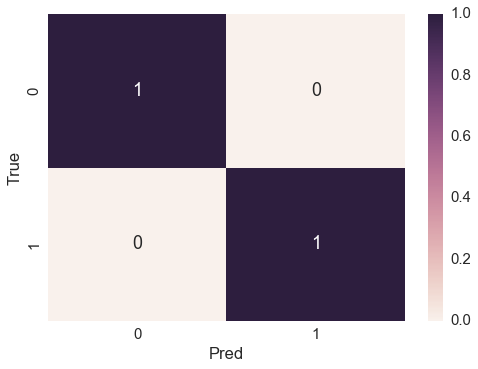

[[ 2  0]
 [ 0 41]]


In [24]:
# Get confusion matrix on test set
y_pred = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print cm

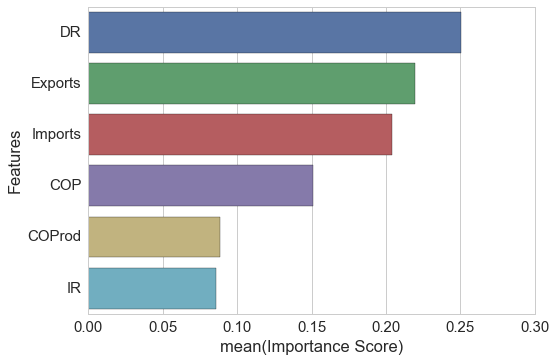

In [25]:
# Plot feature importances
feature_names = X.columns
feature_importances = clf.feature_importances_
feature_dict = dict(zip(feature_names, feature_importances))

features_df = pd.DataFrame(feature_dict.items(), columns=['Features', 'Importance Score'])
features_df.sort_values('Importance Score', inplace=True, ascending=False)
sns.barplot(y='Features', x='Importance Score', data=features_df)

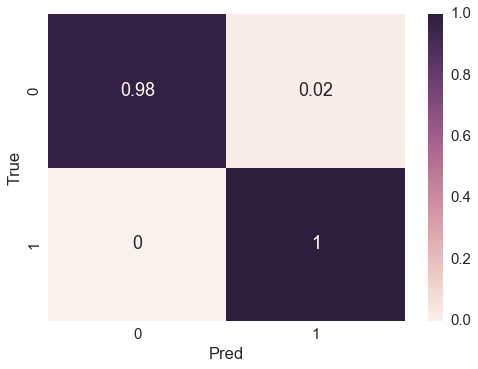

[[ 50   1]
 [  0 372]]


In [26]:
# Get confusion matrix on entire set
y_pred = clf.predict(X)
cm = metrics.confusion_matrix(y, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print cm

Accuracy: 0.993


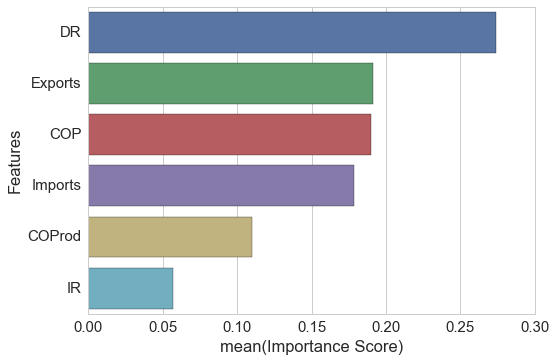

In [27]:
# train RandonForestClassifier on entire set
clf.fit(X, y)

# Evaluate model
print "Accuracy: %0.3f" % clf.score(X, y)

# Plot feature importances
feature_names = X.columns
feature_importances = clf.feature_importances_
feature_dict = dict(zip(feature_names, feature_importances))

features_df = pd.DataFrame(feature_dict.items(), columns=['Features', 'Importance Score'])
features_df.sort_values('Importance Score', inplace=True, ascending=False)
sns.barplot(y='Features', x='Importance Score', data=features_df)

In [28]:
dhh = dff.drop(['Exports'] , axis=1)
dhh.head()

,COP,COProd,DR,IR,Imports,BOT,BOTcat
Year-Month,,,,,,,
1981-1,40.15,2092.0,0.53,12.151585,887.045,226.464,1
1981-2,38.35,1943.0,0.55,12.151585,893.653,-3.837,0
1981-3,38.35,1868.0,0.57,12.151585,990.248,-17.849,0
1981-4,38.35,1623.0,0.60,12.151585,989.797,-87.921,0
1981-5,37.19,1293.0,0.60,12.151585,1018.501,-263.426,0


Accuracy train set: 1.000
Accuracy test set: 0.953


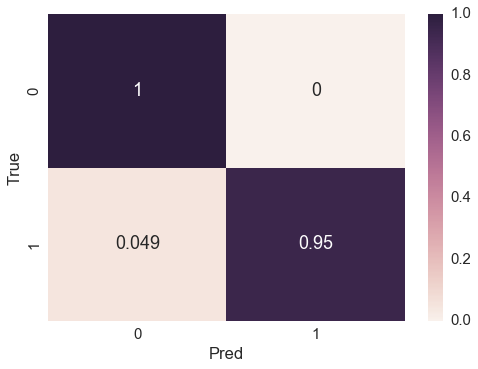

[[ 2  0]
 [ 2 39]]


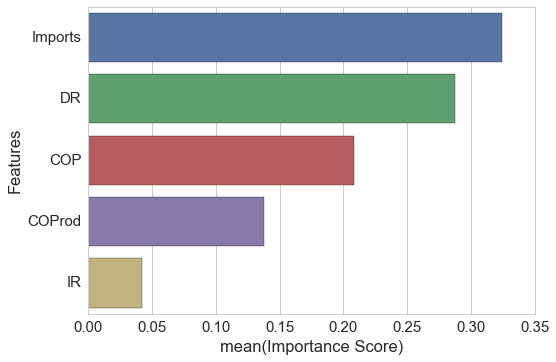

In [29]:
# select columns for X and y
x_cols = ['Imports', 'COP', 'COProd', 'DR', 'IR']
X = dhh[x_cols]
y = dhh['BOTcat']

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.1, random_state=42)

# Instantiate model using RandonForestClassifier
clf = ensemble.RandomForestClassifier(n_estimators=10, class_weight="balanced", random_state=42)

# train RandonForestClassifier on training set
clf.fit(X_train, y_train)

# Evaluate model on train set
print "Accuracy train set: %0.3f" % clf.score(X_train, y_train)

# Evaluate accuracy of model on test set
print "Accuracy test set: %0.3f" % clf.score(X_test, y_test)

# Get confusion matrix on test set
y_pred = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print cm

# Plot feature importances
feature_names = X.columns
feature_importances = clf.feature_importances_
feature_dict = dict(zip(feature_names, feature_importances))

features_df = pd.DataFrame(feature_dict.items(), columns=['Features', 'Importance Score'])
features_df.sort_values('Importance Score', inplace=True, ascending=False)
sns.barplot(y='Features', x='Importance Score', data=features_df)

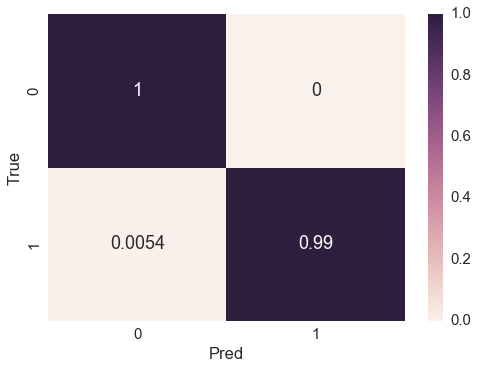

[[ 51   0]
 [  2 370]]
Accuracy: 0.991


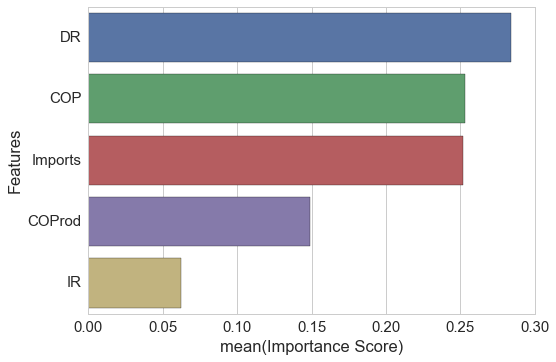

In [30]:
# Get confusion matrix on entire set
y_pred = clf.predict(X)
cm = metrics.confusion_matrix(y, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print cm

# train RandonForestClassifier on entire set
clf.fit(X, y)

# Evaluate model
print "Accuracy: %0.3f" % clf.score(X, y)

# Plot feature importances
feature_names = X.columns
feature_importances = clf.feature_importances_
feature_dict = dict(zip(feature_names, feature_importances))

features_df = pd.DataFrame(feature_dict.items(), columns=['Features', 'Importance Score'])
features_df.sort_values('Importance Score', inplace=True, ascending=False)
sns.barplot(y='Features', x='Importance Score', data=features_df)
